# what can you do with pandas?

**Extra resources:**

* 10 minutes to pandas: https://pandas.pydata.org/docs/getting_started/10min.html#min

<img src = "https://www.hola.com/imagenes//actualidad/2015102781754/trece-pandas-seis-gemelos-china/0-339-649/pandas1-a.jpg?filter=w400&filter=ds75">

In [1]:
import numpy
import pandas

import seaborn
import matplotlib.pyplot as plt

import time
import sys
import os

import requests
from bs4 import BeautifulSoup

/Users/manuel/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pandas.__version__

'1.0.3'

# Pokedex example

What if I don't have a csv? We have information available online. Pandas helps with the scrapping of tables in html format. 

* `pandas.read_html` https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_html.html
* Pokedex database: https://pokemondb.net/pokedex/all

In [3]:
url = "https://pokemondb.net/pokedex/all"
html_text = requests.get(url).content

In [4]:
df_pokedex = pandas.read_html(html_text)[0]
df_pokedex

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
1029,890,Eternatus Eternamax,Poison Dragon,1125,255,115,250,125,250,130
1030,891,Kubfu,Fighting,385,60,90,60,53,50,72
1031,892,Urshifu Single Strike Style,Fighting Dark,550,100,130,100,63,60,97
1032,892,Urshifu Rapid Strike Style,Fighting Water,550,100,130,100,63,60,97


# Pandas data types

## Series

In [5]:
df_pokedex["Name"]

0                         Bulbasaur
1                           Ivysaur
2                          Venusaur
3            Venusaur Mega Venusaur
4                        Charmander
                   ...             
1029            Eternatus Eternamax
1030                          Kubfu
1031    Urshifu Single Strike Style
1032     Urshifu Rapid Strike Style
1033                         Zarude
Name: Name, Length: 1034, dtype: object

In [6]:
type(df_pokedex["Name"])

pandas.core.series.Series

In [7]:
df_pokemon.values

NameError: name 'df_pokemon' is not defined

In [ ]:
type(df_pokedex["Name"].values)

## DataFrames

In [ ]:
df_pokedex.head()

In [ ]:
type(df_pokedex)

In [ ]:
df_pokedex.values

In [8]:
type(df_pokedex.values)

numpy.ndarray

## Indexes

In [9]:
df_pokedex.columns

Index(['#', 'Name', 'Type', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed'],
      dtype='object')

In [10]:
df_pokedex.index

RangeIndex(start=0, stop=1034, step=1)

# Some examples

In [11]:
df_pokedex.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65


*Electric pokemons*

In [12]:
df_pokedex.loc[df_pokedex["Type"] == "Electric"].head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
32,25,Pikachu,Electric,320,35,55,40,50,50,90
33,25,Pikachu Partner Pikachu,Electric,430,45,80,50,75,60,120
34,26,Raichu,Electric,485,60,90,55,90,80,110
131,100,Voltorb,Electric,330,40,30,50,55,55,100
132,101,Electrode,Electric,490,60,50,70,80,80,150


In [13]:
df_pokedex.loc[(df_pokedex["Type"] == "Electric") & 
                (df_pokedex["#"] < 150)]

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
32,25,Pikachu,Electric,320,35,55,40,50,50,90
33,25,Pikachu Partner Pikachu,Electric,430,45,80,50,75,60,120
34,26,Raichu,Electric,485,60,90,55,90,80,110
131,100,Voltorb,Electric,330,40,30,50,55,55,100
132,101,Electrode,Electric,490,60,50,70,80,80,150
161,125,Electabuzz,Electric,490,65,83,57,95,85,105
174,135,Jolteon,Electric,525,65,65,60,110,95,130


*Electric dual type pokemons*

In [14]:
df_pokedex.loc[df_pokedex["Type"].str.contains(" ")]

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
6,6,Charizard,Fire Flying,534,78,84,78,109,85,100
...,...,...,...,...,...,...,...,...,...,...
1028,890,Eternatus,Poison Dragon,690,140,85,95,145,95,130
1029,890,Eternatus Eternamax,Poison Dragon,1125,255,115,250,125,250,130
1031,892,Urshifu Single Strike Style,Fighting Dark,550,100,130,100,63,60,97
1032,892,Urshifu Rapid Strike Style,Fighting Water,550,100,130,100,63,60,97


*Strongest pokemon*

In [15]:
df_pokedex.sort_values(by = "Total", ascending = False)

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
1029,890,Eternatus Eternamax,Poison Dragon,1125,255,115,250,125,250,130
191,150,Mewtwo Mega Mewtwo X,Psychic Fighting,780,106,190,100,154,100,130
192,150,Mewtwo Mega Mewtwo Y,Psychic,780,106,150,70,194,120,140
460,384,Rayquaza Mega Rayquaza,Dragon Flying,780,105,180,100,180,100,115
456,382,Kyogre Primal Kyogre,Water,770,100,150,90,180,160,90
...,...,...,...,...,...,...,...,...,...,...
353,298,Azurill,Normal Fairy,190,50,20,40,20,40,20
1005,872,Snom,Ice Bug,185,30,25,35,45,30,20
956,824,Blipbug,Bug,180,25,20,20,25,45,45
234,191,Sunkern,Grass,180,30,30,30,30,30,30


*Statistics of electric pokemons*

In [16]:
split_columns = df_pokedex["Type"].str.split(" ", expand = True)

df_pokedex["Type 1"] = split_columns[0]
df_pokedex["Type 2"] = split_columns[1]

df_pokedex.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,Grass,Poison
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,Grass,Poison
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,Grass,Poison
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,Grass,Poison
4,4,Charmander,Fire,309,39,52,43,60,50,65,Fire,None


In [17]:
df_pokedex.get(["Name", "Type 1"]).groupby("Type 1").count().sort_values(by = "Name", ascending = False)

,Name
Type 1,
Water,134
Normal,115
Grass,91
Bug,81
Psychic,77
Fire,65
Electric,61
Rock,60
Dark,45


In [21]:
df_pokedex.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,Grass,Poison
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,Grass,Poison
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,Grass,Poison
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,Grass,Poison
4,4,Charmander,Fire,309,39,52,43,60,50,65,Fire,None


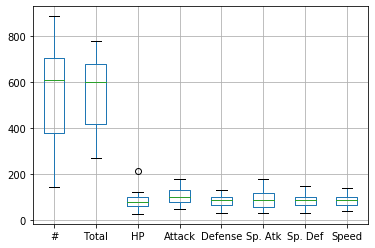

In [28]:
df_pokedex.loc[df_pokedex["Type 1"] == "Dragon"].boxplot()

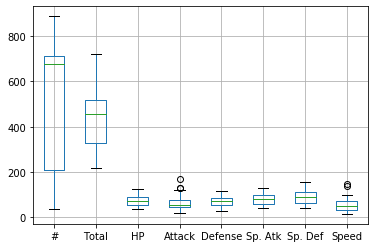

In [29]:
df_pokedex.loc[df_pokedex["Type 1"] == "Fairy"].boxplot()

# Contact

In [ ]:
df_pokedex.boxplot("Total")

Manuel Montoya 
* Mail: manuel.montoya@pucp.edu.pe
* Linkedin: https://www.linkedin.com/in/manuel-montoya-gamio/

<img src="https://miro.medium.com/max/3006/1*KdxlBR9P3mDp9JZ_URMdYQ.jpeg">